In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.8.0'

In [3]:
# Define Parameters
num_classes = 10
img_size = 28

#### Prepare Data

In [4]:
# Method 1
# Load Data from Dataset function
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Check with Data shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
# Method 2
# download from google drive
!gdown --id '19eL6-ytOb_NtLlcJTQ3v5wD2gBFe-xFv' --output mnist.npz

# Load Data from file
with np.load('mnist.npz', allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

# Check with Data shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

Downloading...
From: https://drive.google.com/uc?id=19eL6-ytOb_NtLlcJTQ3v5wD2gBFe-xFv
To: /content/mnist.npz
100% 11.5M/11.5M [00:00<00:00, 240MB/s]


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(<matplotlib.image.AxesImage at 0x7feaf4662c50>, 5)

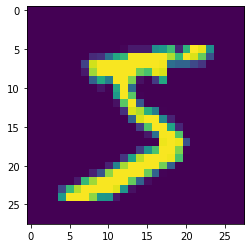

In [5]:
# Show image method 1
plt.imshow(x_train[0]), y_train[0]

(<matplotlib.image.AxesImage at 0x7f502fd2b610>, 5)

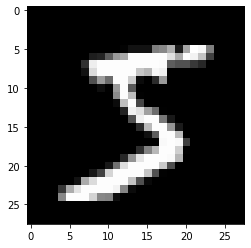

In [23]:
# Show image method 2 with grayscale color map
plt.imshow(x_train[0], cmap=plt.cm.gray), y_train[0]

In [24]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
# Check with the dataset
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
# Flatten img to a vector
x_train = x_train.reshape(x_train.shape[0], -1) # (60000, 28, 28) -> (60000, 784) 
x_test = x_test.reshape(x_test.shape[0], -1)

# normalization to (0 ~ 1), or (-1 ~ 1)
x_train = x_train / 255.
x_test = x_test / 255.

# one-hot encoding
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [7]:
# Check the image after normalization
img = x_train[0]
print(img, img.shape, y_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
y_train[0], np.argmax(y_train[0])

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

#### Build Model

In [ ]:
# Model 1: Functional API
inputs = layers.Input(shape=(img_size*img_size,)) # input shape (784, )
x = layers.Dense(units=10, activation='relu')(inputs)
x = layers.Dense(20, activation=activations.relu)(x)
prediction = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=prediction)

In [ ]:
# Model 2: Sequential
model = models.Sequential()
model.add(layers.Dense(units=10, activation='relu', input_shape=(img_size*img_size,)))
model.add(layers.Dense(units=20, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [11]:
# Model 3: Sequential
model = models.Sequential([
    layers.Dense(units=10, activation='relu', input_shape=(img_size*img_size,)),
    layers.Dense(units=20, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Model 4: Subclass

class MyModel(tf.keras.Model):

    def __init__(self):
        super().__init__()
        self.dense1 = layers.Dense(10, activation=activations.relu)
        self.dense2 = layers.Dense(20, activation=activations.relu)
        self.dense3 = layers.Dense(num_classes, activation=activations.softmax)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

model = MyModel()
model.build((1, 784))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


#### Training

In [ ]:
# Method 1 : training from scratch

epochs = 10
batch_size = 128
# Instantiate an optimizer.
optimizer = optimizers.SGD(learning_rate=1e-3) # 10^-3 = 0.001, 1e-2, 1e-4
# Instantiate a loss function.
loss_fn = losses.CategoricalCrossentropy()

# Start training
for epoch in range(epochs):
    print(f'Epoch: {epoch}')

    for step, idx in enumerate(range(0, len(x_train), batch_size)):
        # get x, y data
        x_batch = x_train[idx: idx+batch_size]
        y_batch = y_train[idx: idx+batch_size]

        # compute loss
        with tf.GradientTape() as tape:
            pred = model(x_batch)
            loss_value = loss_fn(y_batch, pred)
        # get gradient
        grads = tape.gradient(loss_value, model.trainable_weights)
        # update model
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'step : {step} loss: {loss_value}')

In [30]:
# Method 2

# Setting for training
model.compile(loss=losses.categorical_crossentropy, # loss function
              optimizer=optimizers.SGD(),
              metrics=['accuracy'] # (Optional)
              )

In [31]:
logs = model.fit(x_train, y_train,
                 batch_size=128,
                 epochs=10,
                 validation_data=(x_test, y_test),
                 callbacks=tf.keras.callbacks.EarlyStopping(patience=5))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2530 - accuracy: 0.9285 - val_loss: 0.2546 - val_accuracy: 0.9266
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.9293 - val_loss: 0.2522 - val_accuracy: 0.9267
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9295 - val_loss: 0.2519 - val_accuracy: 0.9263
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2471 - accuracy: 0.9296 - val_loss: 0.2489 - val_accuracy: 0.9260
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2453 - accuracy: 0.9304 - val_loss: 0.2482 - val_accuracy: 0.9277
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2435 - accuracy: 0.9313 - val_loss: 0.2476 - val_accuracy: 0.9270
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9319 - val_loss: 0.2458 - val_accuracy: 0.9281
Epoch 

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')

test loss: 0.24138732254505157, test acc: 0.9279000163078308


#### Tesing

In [37]:
img = x_test[0:1] # batch_size

prediction = model.predict(img) # (1, 784) 
print('model prediction: ', prediction)
print('pred shape: ', prediction.shape) # (1, 10)
print('max probability index: ', np.argmax(prediction, axis=-1))

print(y_test[0], np.argmax(y_test[0]))

model prediction:  [[2.1004342e-03 2.5654717e-07 1.8998403e-03 1.2118167e-02 1.0169655e-06
  7.0381902e-05 3.4306469e-09 9.7663713e-01 3.7822081e-04 6.7945090e-03]]
pred shape:  (1, 10)
max probability index:  [7]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


In [54]:
history = logs.history
history

{'accuracy': [0.9285333156585693,
  0.9292833209037781,
  0.9295499920845032,
  0.9296333193778992,
  0.9304166436195374,
  0.9312999844551086,
  0.9319166541099548,
  0.9314333200454712,
  0.9327333569526672,
  0.9329000115394592],
 'loss': [0.25302615761756897,
  0.2509927749633789,
  0.24906663596630096,
  0.2470996230840683,
  0.24531900882720947,
  0.24353274703025818,
  0.24162311851978302,
  0.23988673090934753,
  0.23812831938266754,
  0.23645614087581635],
 'val_accuracy': [0.9265999794006348,
  0.9266999959945679,
  0.9262999892234802,
  0.9259999990463257,
  0.9276999831199646,
  0.9269999861717224,
  0.9280999898910522,
  0.9279999732971191,
  0.9276000261306763,
  0.9279000163078308],
 'val_loss': [0.25463539361953735,
  0.2522456645965576,
  0.25188297033309937,
  0.24885348975658417,
  0.24819433689117432,
  0.2476465106010437,
  0.2458159625530243,
  0.24395737051963806,
  0.24378152191638947,
  0.24138718843460083]}

In [56]:
# Get max accuracy and min loss from history
max_acc = np.max(history['val_accuracy'])
min_loss = np.min(history['val_loss'])
print(max_acc, min_loss)

0.9280999898910522 0.24138718843460083


Text(0.5, 1.0, 'accuracy')

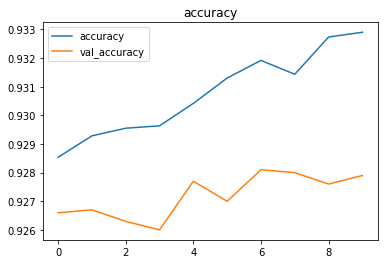

In [44]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

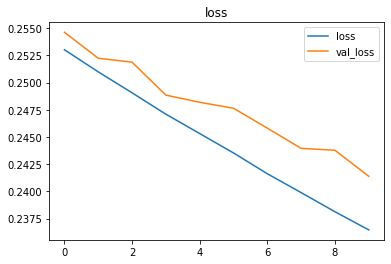

In [45]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

#### Metrics

In [46]:
# y_true = (10000, 10)
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1) # Ground Truth: [1, 2, 3, 4, 0, 1, 9..] -> (10000, )
y_pred = np.argmax(model.predict(x_test), axis=-1) # Model prediction [1, 2, 3, 4, 0, 1, 9..] -> (10000, )
print(y_true.shape, y_pred.shape)


(10000,) (10000,)


In [47]:
# Classification Report
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
label_names = [str(i) for i in range(10)] # ['0' ~  '9']
print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.97      0.96      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.90      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.88      0.89       892
           6       0.92      0.94      0.93       958
           7       0.94      0.93      0.93      1028
           8       0.90      0.90      0.90       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



#### Save & load model

In [51]:
# Method 1: Save Whole model = model architecture + model weights + optimizer
# Save the complete model
model.save('my_model.h5')

# Load model
model = models.load_model('my_model.h5')

In [52]:
# Method 2: save and load "Weights , Bias" only
model.save_weights('my_model_weights.h5')

# Rebuild model before load weights !
model.load_weights('my_model_weights.h5')